# 1. Project Health Insurance Claim Prediction

## 1.1 วัตถุประสงค์ของโปรเจค

    💚 วัตถุประสงค์หลักของการทำ Health Insurance Claim Prediction แบบ Sepervised Learninig Regression 
    คือ การสร้างโมเดลที่สามารถทำนายประกันสุขภาพของผู้ถือกรมธรรม์ว่าจะมีการใช้ประมาณเท่าไหร่ต่อรอบกรมธรรม์

# 2. Importing Libraries

## 1.2 Data Definition

In [311]:
!pip install -U imbalanced-learn

In [312]:
!pip  install missingno

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mso

import warnings 
warnings.filterwarnings("ignore")

In [314]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [315]:
# For Models
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# For Evaluation 
from sklearn.metrics import r2_score



# 3. Reading Dataset

In [316]:
df=pd.read_csv(r"C:\Users\muent\Desktop\my project for data analyst\Project-14_Health_Insurance_Claim_Prediction\Dataset\Health_Insurance_Dataset.csv")

In [317]:
df

age     sex  weight   bmi hereditary_diseases  no_of_dependents  \
0      60.0    male      64  24.3           NoDisease                 1   
1      49.0  female      75  22.6           NoDisease                 1   
2      32.0  female      64  17.8            Epilepsy                 2   
3      61.0  female      53  36.4           NoDisease                 1   
4      19.0  female      50  20.6           NoDisease                 0   
...     ...     ...     ...   ...                 ...               ...   
14995  39.0    male      49  28.3           NoDisease                 1   
14996  39.0    male      74  29.6           NoDisease                 4   
14997  20.0    male      62  33.3           NoDisease                 0   
14998  52.0    male      88  36.7           NoDisease                 0   
14999  52.0    male      57  26.4           NoDisease                 3   

       smoker         city  bloodpressure  diabetes  regular_ex  \
0           0      NewYork             72         0           0   
1           0       Boston             78         1           1   
2           1  Phildelphia             88         1           1   
3           1    Pittsburg             72         1           0   
4           0      Buffalo             82         1           0   
...       ...          ...            ...       ...         ...   
14995       1     Florence             54         1           0   
14996       0        Miami             64         1           0   
14997       0        Tampa             52         1           0   
14998       0   PanamaCity             70         1           0   
14999       0    Kingsport             72         1           0   

             job_title    claim  
0                Actor  13112.6  
1             Engineer   9567.0  
2          Academician  32734.2  
3                 Chef  48517.6  
4           HomeMakers   1731.7  
...                ...      ...  
14995        FilmMaker  21082.2  
14996          Student   7512.3  
14997  FashionDesigner   1391.5  
14998           Farmer   9144.6  
14999          Manager  25992.8  

[15000 rows x 13 columns]

### Variables :

1. age : อายุผู้ถือกรมธรรม์ (Numeric)
2. sex: เพศผู้ถือกรมธรรม์ (Categoric)
3. weight: น้ำหนักตัว (Numeric)
4. bmi: ดัชนีมวลกาย (Numeric)
5. hereditary_diseases: โรคประจำตัว (Categoric)
6. no_of_dependents: จำนวนผู้อยู่ในอุปการะของผู้ถือกรมธรรม์ (Numeric)
7. smoker: การสูบบุหรี่ (non-smoker=0;smoker=1) (Categoric)
8. city: เมืองที่อาศัย (Categoric)
9. bloodpressure: ความดันโลหิต (Numeric)
10. diabetes: โรคเบาหวาน (non-diabetic=0; diabetic=1) (Categoric)
11. regular_ex: การออกกำลังกาย (no-excercise=0; excercise=1) (Categoric)
12. job_title: อาชีพ (Categoric)
13. claim: จำนวนเงินเรียกร้องค่าสินไหมประกันสุขภาพ (Numeric)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [319]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

# 4. Data Exploration(EDA)

**ตัวแปรประเภทหมวดหมู่ (Categorical Variable)**
- ได้แก่ sex, hereditary_diseases, city, job_title, smoker, diabetes, regular_ex 

**ตัวแปรประเภทตัวเลข (Numerical Variable)**
- ได้แก่ age, weight, bmi, no_of_dependents, bloodpressure, claim

## 4.1 Categorical Variable

### 4.1.1 Sex

In [320]:
df.sex.value_counts(dropna= False)

female    7652
male      7348
Name: sex, dtype: int64

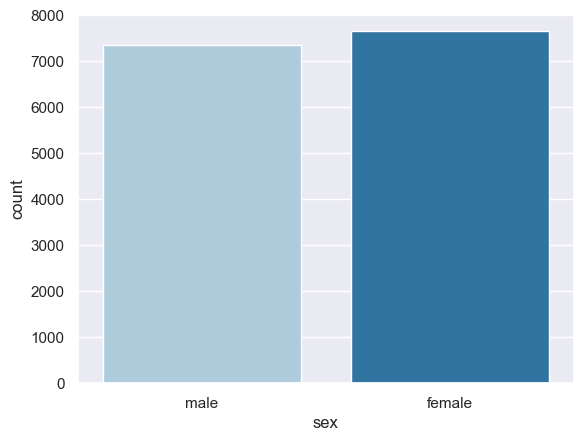

In [321]:
sns.countplot(data = df , x = "sex", palette= "Paired")
plt.show()

In [322]:
countMale = len(df[df.sex == "male"])
countFemale = len(df[df.sex == "female"])
countNull = len(df[df.sex.isnull()])

print("Percantage of Male policyholder  : {:.2f}%".format(countMale*100/len(df.sex)))
print("Percantage of Female policyholder  : {:.2f}%".format(countFemale*100/len(df.sex)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.sex)))

Percantage of Male policyholder  : 48.99%
Percantage of Female policyholder  : 51.01%
Missing values percentage: 0.00%


    💚 จำนวนผู้ถือกรมธรรม์เพศหญิงสูงกว่าเพศชาย
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.2 Hereditary_diseases

In [323]:
df.hereditary_diseases.value_counts(dropna= False)

NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: hereditary_diseases, dtype: int64

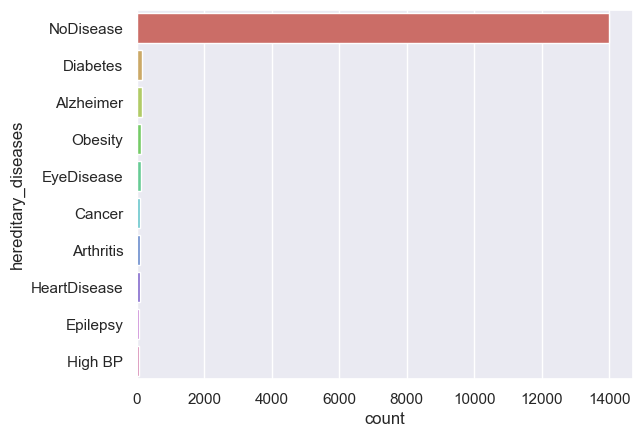

In [324]:
sns.countplot(data = df , y = "hereditary_diseases", palette= "hls", order=df['hereditary_diseases'].value_counts().index )
plt.show()

In [325]:
df.hereditary_diseases.unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [326]:
countNoDisease = len(df[df.hereditary_diseases == "NoDisease"])
countDiabetes = len(df[df.hereditary_diseases == "Diabetes"])
countAlzheimer = len(df[df.hereditary_diseases == "Alzheimer"])
countObesity = len(df[df.hereditary_diseases == "Obesity"])
countEyeDisease = len(df[df.hereditary_diseases == "EyeDisease"])
countCancer = len(df[df.hereditary_diseases == "Cancer"])
countArthritis = len(df[df.hereditary_diseases == "Arthritis"])
countHeartDisease = len(df[df.hereditary_diseases == "HeartDisease"])
countEpilepsy = len(df[df.hereditary_diseases == "Epilepsy"])
countHighBP = len(df[df.hereditary_diseases == "High BP"])
countNull = len(df[df.hereditary_diseases.isnull()])

print("Percantage of NoDisease  : {:.2f}%".format(countNoDisease*100/len(df.hereditary_diseases)))
print("Percantage of Diabetes  : {:.2f}%".format(countDiabetes*100/len(df.hereditary_diseases)))
print("Percantage of Alzheimer  : {:.2f}%".format(countAlzheimer*100/len(df.hereditary_diseases)))
print("Percantage of Obesity  : {:.2f}%".format(countObesity*100/len(df.hereditary_diseases)))
print("Percantage of EyeDisease  : {:.2f}%".format(countEyeDisease *100/len(df.hereditary_diseases)))
print("Percantage of Cancer  : {:.2f}%".format(countCancer*100/len(df.hereditary_diseases)))
print("Percantage of Arthritis  : {:.2f}%".format(countArthritis*100/len(df.hereditary_diseases)))
print("Percantage of HeartDisease  : {:.2f}%".format(countHeartDisease*100/len(df.hereditary_diseases)))
print("Percantage of Epilepsy  : {:.2f}%".format(countEpilepsy*100/len(df.hereditary_diseases)))
print("Percantage of High BP  : {:.2f}%".format(countHighBP*100/len(df.hereditary_diseases)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.hereditary_diseases)))

Percantage of NoDisease  : 93.32%
Percantage of Diabetes  : 0.99%
Percantage of Alzheimer  : 0.96%
Percantage of Obesity  : 0.91%
Percantage of EyeDisease  : 0.82%
Percantage of Cancer  : 0.73%
Percantage of Arthritis  : 0.64%
Percantage of HeartDisease  : 0.62%
Percantage of Epilepsy  : 0.56%
Percantage of High BP  : 0.46%
Missing values percentage: 0.00%


    💚 จำนวนผู้ถือกรมธรรม์ส่วนมากไม่มีโรคประจำตัว
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.3 Smoker

In [327]:
df.smoker.value_counts(dropna= False)

0    12028
1     2972
Name: smoker, dtype: int64

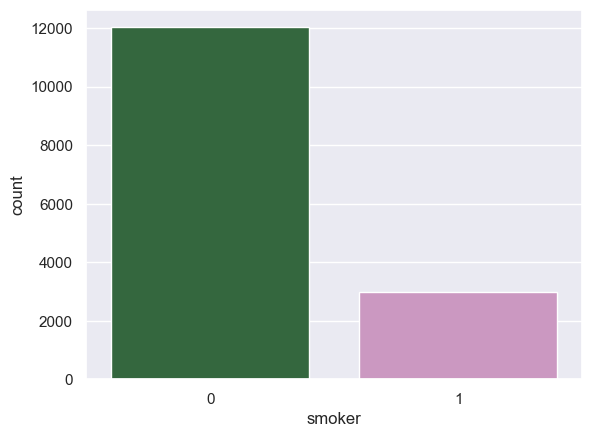

In [328]:
sns.countplot(data = df , x = "smoker", palette= "cubehelix")
plt.show()

In [329]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [330]:
countNoSmoker= len(df[df.smoker == 0])
countSmoker = len(df[df.smoker == 1])
countNull = len(df[df.smoker.isnull()])

print("Percantage of No Smoker  : {:.2f}%".format(countNoSmoker*100/len(df.smoker)))
print("Percantage of Smoker  : {:.2f}%".format(countSmoker*100/len(df.smoker)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.smoker)))

Percantage of No Smoker  : 80.19%
Percantage of Smoker  : 19.81%
Missing values percentage: 0.00%


    💚 จำนวนผู้ถือกรมธรรม์ส่วนมากไม่สูบบุหรี่
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.4 City

In [331]:
df.city.value_counts(dropna=False)

NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: city, Length: 91, dtype: int64

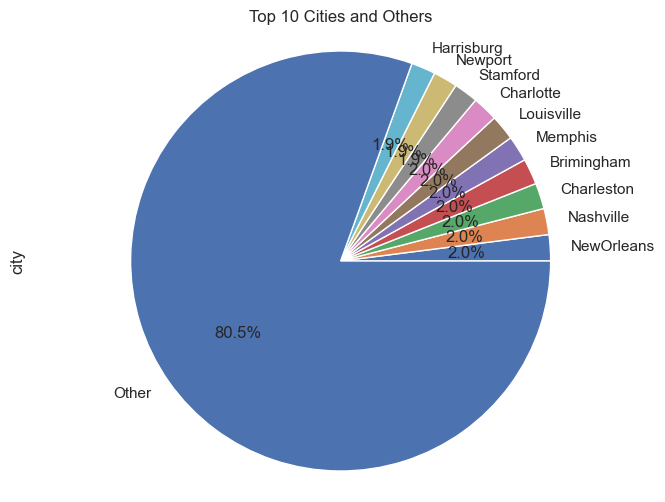

In [332]:
city_counts = df['city'].value_counts()

# 10 เมืองที่มีผู้ถือกรมธรรม์ส่วนมาก
top_cities = city_counts.head(10)

# รวมส่วนที่เหลือเป็น 'Other'
other = city_counts.sum() - top_cities.sum()
top_cities['Other'] = other

# สร้าง pie chart
plt.figure(figsize=(8, 6))
top_cities.plot.pie(autopct='%1.1f%%')
plt.axis('equal')  # ทำให้ pie chart เป็นวงกลม
plt.title('Top 10 Cities and Others')
plt.show()

    💚 แสดงเมืองที่ผู้ถือกรมธรรม์อยู่อาศัย
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.5 diabetes

In [333]:
df.diabetes.value_counts(dropna= False)

# 0 Non diabetic
# 1 Diabetic

1    11655
0     3345
Name: diabetes, dtype: int64

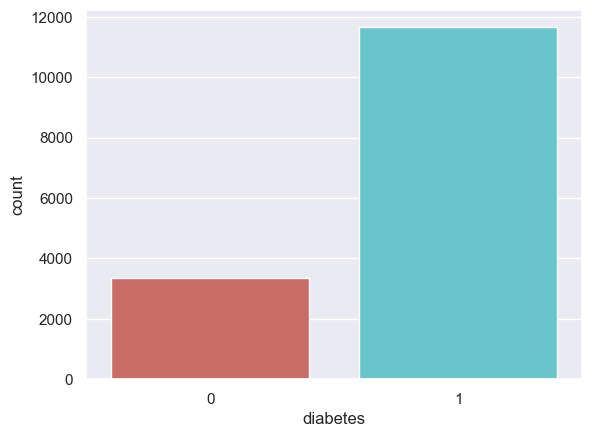

In [334]:
sns.countplot(data = df , x = "diabetes", palette= "hls")
plt.show()

In [335]:
countNoDiabete= len(df[df.diabetes == 0])
countDiabete = len(df[df.diabetes == 1])
countNull = len(df[df.diabetes.isnull()])

print("Percantage of No Diabete  : {:.2f}%".format(countNoDiabete*100/len(df.diabetes)))
print("Percantage of Diabete  : {:.2f}%".format(countDiabete*100/len(df.diabetes)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.diabetes)))

Percantage of No Diabete  : 22.30%
Percantage of Diabete  : 77.70%
Missing values percentage: 0.00%


    💚 ผู้ถือกรมธรรม์เป็นโรคเบาหวานสูงกว่าผู้ที่ไม่เป็นโรคเบาหวาน
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.6 Regular Exercise

In [336]:
df.regular_ex.value_counts(dropna= False)

# 0 No Exercise
# 1 Exercise

0    11638
1     3362
Name: regular_ex, dtype: int64

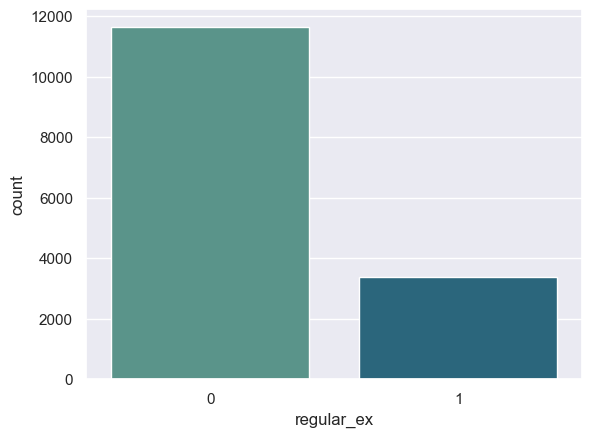

In [337]:
sns.countplot(data = df , x = "regular_ex", palette= "crest")
plt.show()

In [338]:
countNoExercise= len(df[df.regular_ex == 0])
countExercise = len(df[df.regular_ex == 1])
countNull = len(df[df.regular_ex.isnull()])

print("Percantage of No Exercise : {:.2f}%".format(countNoExercise*100/len(df.regular_ex)))
print("Percantage of Exercise  : {:.2f}%".format(countExercise*100/len(df.regular_ex)))
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.regular_ex)))

Percantage of No Exercise : 77.59%
Percantage of Exercise  : 22.41%
Missing values percentage: 0.00%


    💚 ผู้ถือกรมธรรม์ไม่ชอบออกกำลังกายมีจำนวนสูงกว่าผู้ที่ออกกำลังกาย
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

### 4.1.7 Job Title

In [339]:
df.job_title.value_counts(dropna= False) 

Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
FashionDesigner       371
Politician            370
Accountant            368
Clerks                367
Architect             365
ITProfessional        348
DataScientist         335
Lawyer                309
Academician           306
Doctor                294
DefencePersonnels     292
Technician            283
Chef                  281
FilmDirector          281
Blogger               281
Journalist            275
CA                    272
Farmer                258
Analyst               255
GovEmployee           250
Buisnessman           242
Labourer              210
Name: job_title, dtype: int64

In [340]:
countNull = len(df[df.job_title.isnull()])
print("Missing values percentage: {:.2f}%".format(countNull*100/len(df.job_title)))

Missing values percentage: 0.00%


    💚  แสดงอาชีพของผู้ถือกรมธรรม์
    ✅ ในคอลัมน์นี้ไม่มี Missing Value 

## 4.2 Numerical Variable

**ตัวแปรประเภทตัวเลข (Numerical Variable)**
- ได้แก่ age, weight, bmi, no_of_dependents, bloodpressure, claim

### 4.2.1 Describe Numerical Variable (สถิติเบื้องต้น)

In [341]:
df

age     sex  weight   bmi hereditary_diseases  no_of_dependents  \
0      60.0    male      64  24.3           NoDisease                 1   
1      49.0  female      75  22.6           NoDisease                 1   
2      32.0  female      64  17.8            Epilepsy                 2   
3      61.0  female      53  36.4           NoDisease                 1   
4      19.0  female      50  20.6           NoDisease                 0   
...     ...     ...     ...   ...                 ...               ...   
14995  39.0    male      49  28.3           NoDisease                 1   
14996  39.0    male      74  29.6           NoDisease                 4   
14997  20.0    male      62  33.3           NoDisease                 0   
14998  52.0    male      88  36.7           NoDisease                 0   
14999  52.0    male      57  26.4           NoDisease                 3   

       smoker         city  bloodpressure  diabetes  regular_ex  \
0           0      NewYork             72         0           0   
1           0       Boston             78         1           1   
2           1  Phildelphia             88         1           1   
3           1    Pittsburg             72         1           0   
4           0      Buffalo             82         1           0   
...       ...          ...            ...       ...         ...   
14995       1     Florence             54         1           0   
14996       0        Miami             64         1           0   
14997       0        Tampa             52         1           0   
14998       0   PanamaCity             70         1           0   
14999       0    Kingsport             72         1           0   

             job_title    claim  
0                Actor  13112.6  
1             Engineer   9567.0  
2          Academician  32734.2  
3                 Chef  48517.6  
4           HomeMakers   1731.7  
...                ...      ...  
14995        FilmMaker  21082.2  
14996          Student   7512.3  
14997  FashionDesigner   1391.5  
14998           Farmer   9144.6  
14999          Manager  25992.8  

[15000 rows x 13 columns]

In [342]:
df[["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"]].describe()

age        weight           bmi  no_of_dependents  \
count  14604.000000  15000.000000  14044.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       14.015966     13.701935      6.122950          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.700000          0.000000   
50%       40.000000     63.000000     29.400000          1.000000   
75%       52.000000     76.000000     34.400000          2.000000   
max       64.000000     95.000000     53.100000          5.000000   

       bloodpressure         claim  
count   15000.000000  15000.000000  
mean       68.650133  13401.437620  
std        19.418515  12148.239619  
min         0.000000   1121.900000  
25%        64.000000   4846.900000  
50%        71.000000   9545.650000  
75%        80.000000  16519.125000  
max       122.000000  63770.400000

### 4.2.2 Distribution of Numerical Variable

💚🧡 จะพล็อตกราฟ Histogram  และ Box plot เพื่อพิจารณาการกระจายตัวและ ดู outlier

#### 4.2.2.1 Histogram Distribution 💚💛 กราฟแสดงการกระจายตัวของตัวแปรประเภท numerical variable

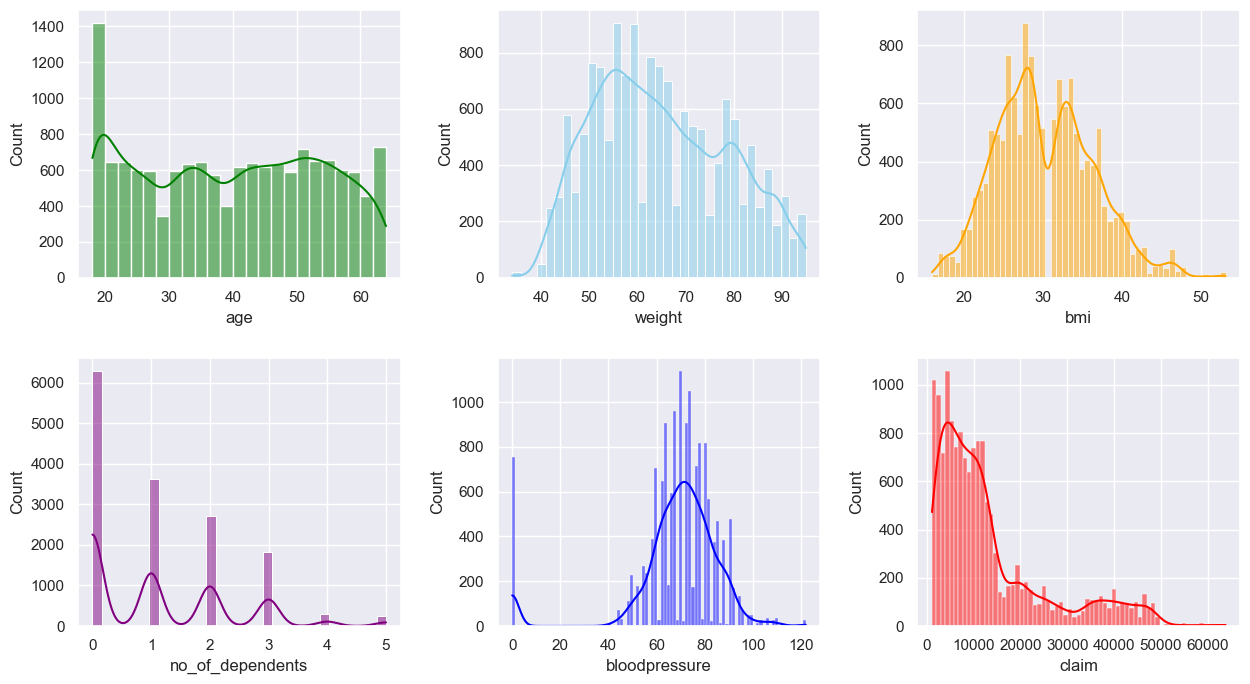

In [343]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=False)  # sharex=False เพื่อไม่ให้แกน x ของแต่ละกราฟเชื่อมโยงกัน

sns.histplot(data=df, x="age", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="weight", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="bmi", kde=True, ax=axs[0, 2], color='orange')
sns.histplot(data=df, x="no_of_dependents", kde=True, ax=axs[1, 0], color='purple')
sns.histplot(data=df, x="bloodpressure", kde=True, ax=axs[1, 1], color='blue')
sns.histplot(data=df, x="claim", kde=True, ax=axs[1, 2], color='red')

# ปรับช่องว่างระหว่างกราฟด้านบนและด้านล่าง
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3)  

#### 4.2.2.1 Boxplot 💚💛 กราฟแสดง outlier

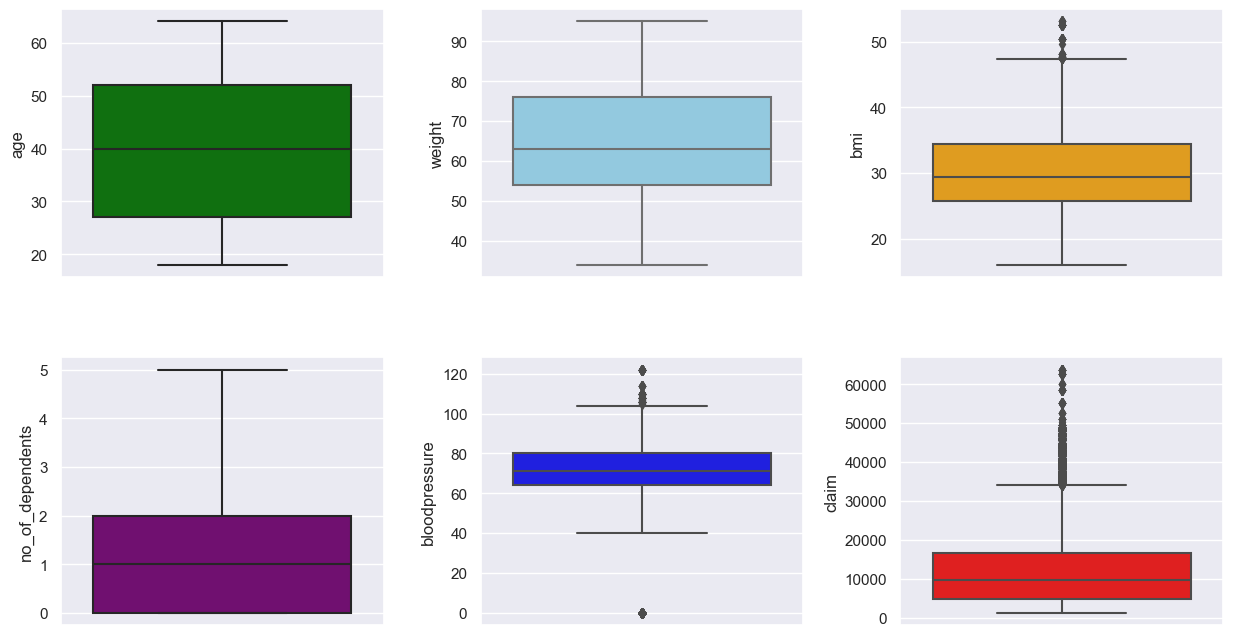

In [344]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=False)  # sharex=False เพื่อไม่ให้แกน x ของแต่ละกราฟเชื่อมโยงกัน

sns.boxplot(data=df, y="age",ax=axs[0, 0], color='green')
sns.boxplot(data=df, y="weight",  ax=axs[0, 1], color='skyblue')
sns.boxplot(data=df, y="bmi",  ax=axs[0, 2], color='orange')
sns.boxplot(data=df, y="no_of_dependents",  ax=axs[1, 0], color='purple')
sns.boxplot(data=df, y="bloodpressure", ax=axs[1, 1], color='blue')
sns.boxplot(data=df, y="claim",  ax=axs[1, 2], color='red')

# ปรับช่องว่างระหว่างกราฟด้านบนและด้านล่าง
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3)  

- การกระจายตัวของ age, weight, bmi, no_of_dependents, bloodpressure, claim เป็นแบบกราฟเบ้ 
- และ bmi, bloodpressure, claim  มีค่า outlier ด้วย 

## 4.3 Correlation (ความสัมพันธ์ของตัวแปร)

In [345]:
df[["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"]].corr()

age    weight       bmi  no_of_dependents  \
age               1.000000  0.285646  0.188336          0.060436   
weight            0.285646  1.000000  0.251649          0.135687   
bmi               0.188336  0.251649  1.000000          0.051498   
no_of_dependents  0.060436  0.135687  0.051498          1.000000   
bloodpressure    -0.008317 -0.020835 -0.041454          0.024849   
claim             0.301158  0.077716  0.206588          0.067614   

                  bloodpressure     claim  
age                   -0.008317  0.301158  
weight                -0.020835  0.077716  
bmi                   -0.041454  0.206588  
no_of_dependents       0.024849  0.067614  
bloodpressure          1.000000  0.013742  
claim                  0.013742  1.000000

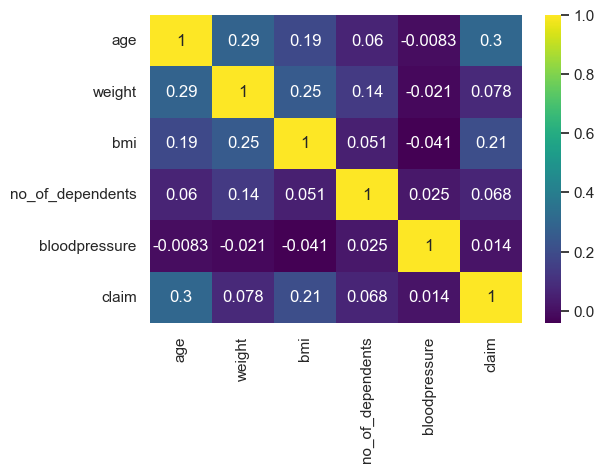

In [346]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"]].corr(), annot= True, cmap='viridis')
plt.show()

#### 💛💚🧡 ลักษณะของ Correlation ข้อมูลชุดนี้ไม่มีความสัมพันธ์แบบ Non-linear

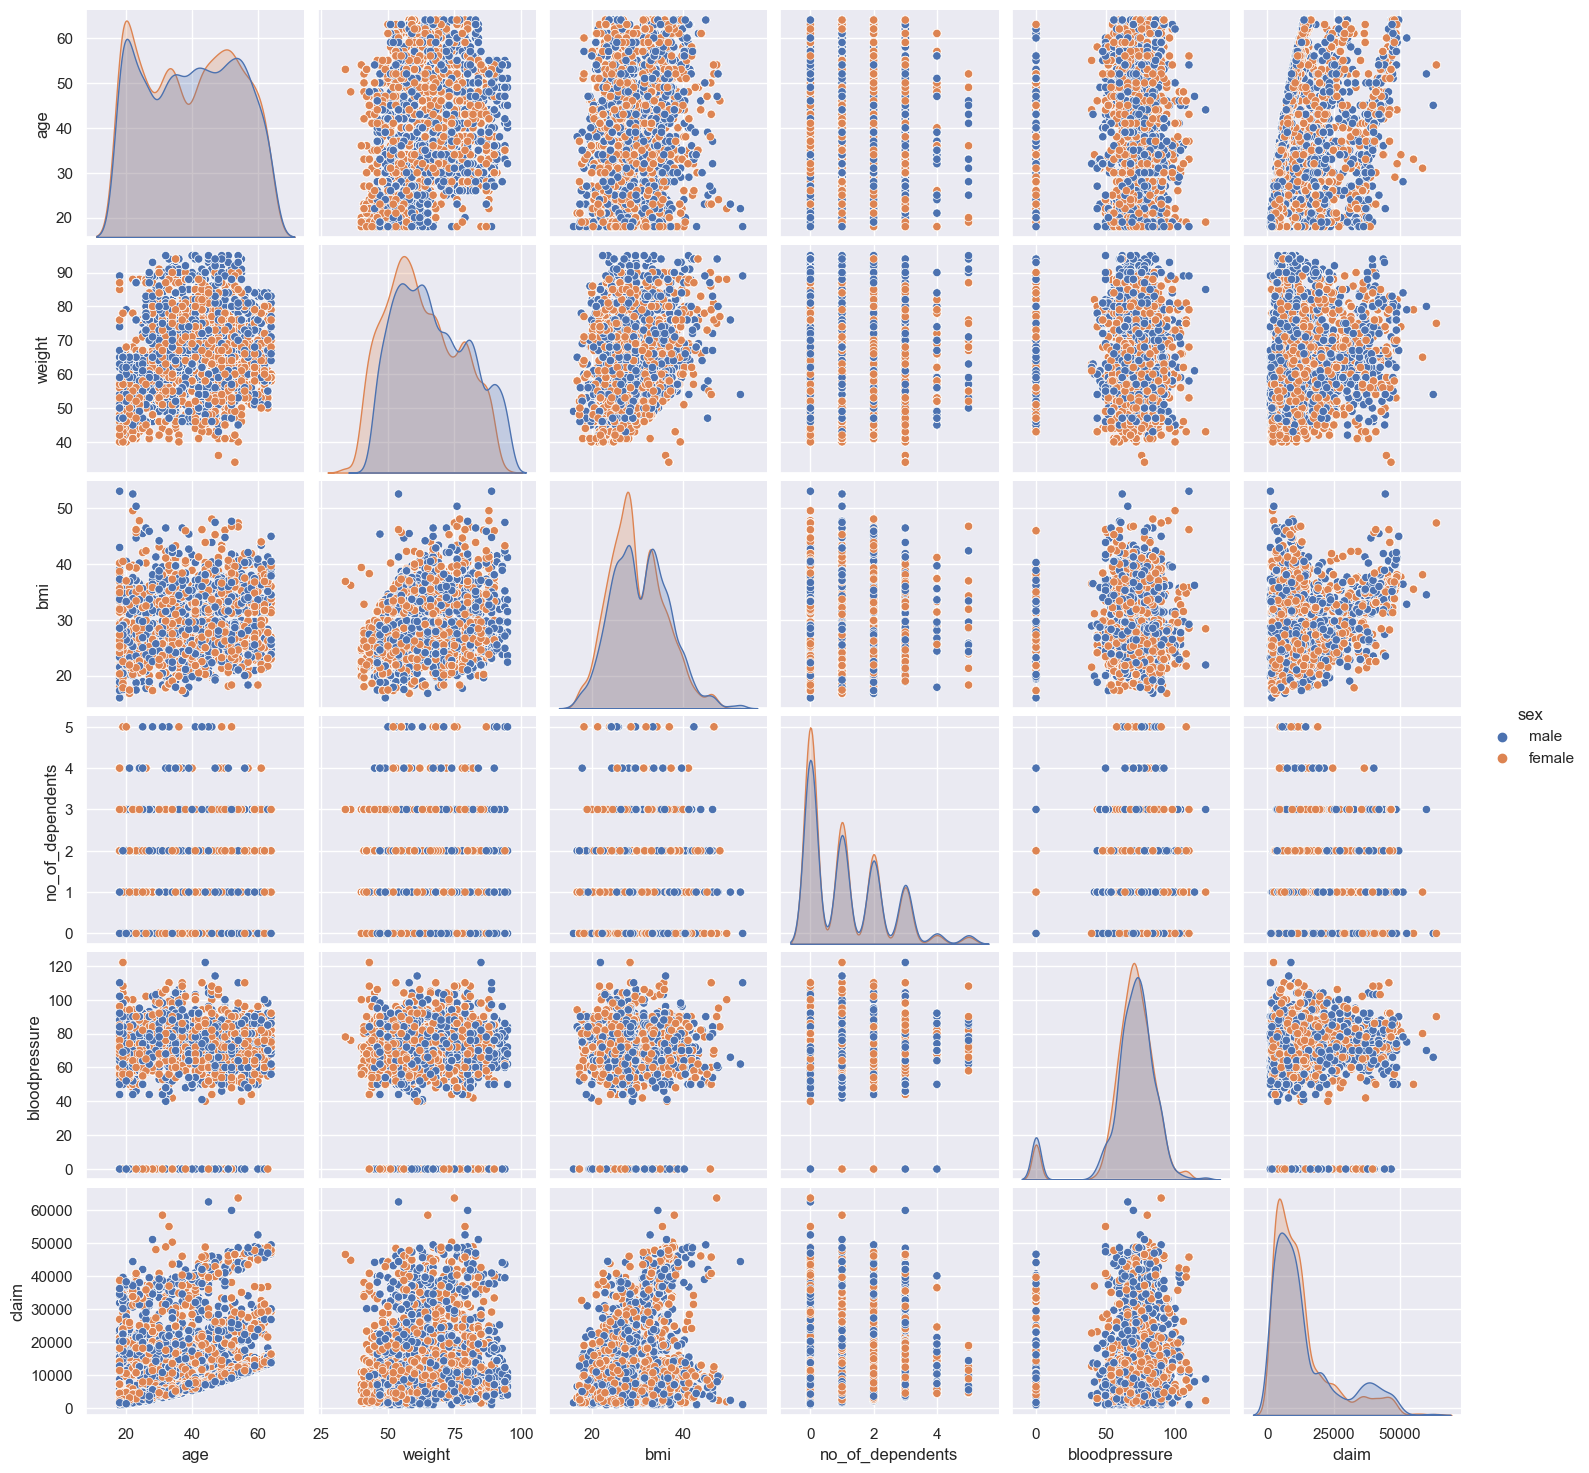

In [347]:
sns.pairplot(df, 
             vars = ["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"],
            hue = "sex")
plt.show()

#### 💛💚🧡 ลักษณะของ Pair Plots ข้อมูลชุดนี้เป็นความสัมพันธ์แบบ Non-linear

## 4.4 Handle missing values

In [348]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

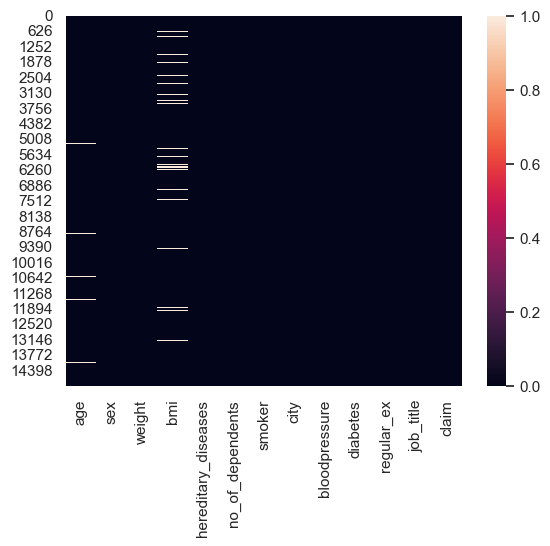

In [349]:
sns.heatmap(df.isnull())
plt.show()

    🧡 แสดงค่า null ของแต่ละตัวแปร
    🧡 age และ bmi มี missing values

# 5. Data Preprocessing

## 5.2 Data Imputation การประมาณค่าสำหรับจัดการตัวแปรที่มีค่าหายไป(Missing Values)

    💚 ตัวแปรที่มีค่าหายไป(Missing Values) คือ age และ bmi ซึ่งเป็นตัวแปรประเภท Numerical variable 
    💚 ในส่วนของตัวแปรชนิด Numerical Variables จะแทนค่าที่หายไปด้วย ค่า "mean"

In [350]:
# coumns ที่เป็น Numerical Variables   ที่มี missing values
# age และ bmi 

df.select_dtypes(include=['int64', 'float64']).isnull().sum()

age                 396
weight                0
bmi                 956
no_of_dependents      0
smoker                0
bloodpressure         0
diabetes              0
regular_ex            0
claim                 0
dtype: int64

In [351]:
df["age"].fillna(df["age"].mean(), inplace = True)
df["bmi"].fillna(df["bmi"].mean(), inplace = True)

## 5.3 One-hot Encoding

    🧡 การทำรหัส encoding สำหรับข้อมูล

In [352]:
df.head()

age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7

In [353]:
df = pd.get_dummies(df, drop_first=True)

In [354]:
df

age  weight   bmi  no_of_dependents  smoker  bloodpressure  diabetes  \
0      60.0      64  24.3                 1       0             72         0   
1      49.0      75  22.6                 1       0             78         1   
2      32.0      64  17.8                 2       1             88         1   
3      61.0      53  36.4                 1       1             72         1   
4      19.0      50  20.6                 0       0             82         1   
...     ...     ...   ...               ...     ...            ...       ...   
14995  39.0      49  28.3                 1       1             54         1   
14996  39.0      74  29.6                 4       0             64         1   
14997  20.0      62  33.3                 0       0             52         1   
14998  52.0      88  36.7                 0       0             70         1   
14999  52.0      57  26.4                 3       0             72         1   

       regular_ex    claim  sex_male  ...  job_title_Journalist  \
0               0  13112.6         1  ...                     0   
1               1   9567.0         0  ...                     0   
2               1  32734.2         0  ...                     0   
3               0  48517.6         0  ...                     0   
4               0   1731.7         0  ...                     0   
...           ...      ...       ...  ...                   ...   
14995           0  21082.2         1  ...                     0   
14996           0   7512.3         1  ...                     0   
14997           0   1391.5         1  ...                     0   
14998           0   9144.6         1  ...                     0   
14999           0  25992.8         1  ...                     0   

       job_title_Labourer  job_title_Lawyer  job_title_Manager  \
0                       0                 0                  0   
1                       0                 0                  0   
2                       0                 0                  0   
3                       0                 0                  0   
4                       0                 0                  0   
...                   ...               ...                ...   
14995                   0                 0                  0   
14996                   0                 0                  0   
14997                   0                 0                  0   
14998                   0                 0                  0   
14999                   0                 0                  1   

       job_title_Photographer  job_title_Police  job_title_Politician  \
0                           0                 0                     0   
1                           0                 0                     0   
2                           0                 0                     0   
3                           0                 0                     0   
4                           0                 0                     0   
...                       ...               ...                   ...   
14995                       0                 0                     0   
14996                       0                 0                     0   
14997                       0                 0                     0   
14998                       0                 0                     0   
14999                       0                 0                     0   

       job_title_Singer  job_title_Student  job_title_Technician  
0                     0                  0                     0  
1                     0                  0                     0  
2                     0                  0                     0  
3                     0                  0                     0  
4                     0                  0                     0  
...                 ...                ...                   ...  
14995                 0                  0                     0  
14996                 0             

## 5.4 Handle Outliers

#### 💛 จัดการค่า Outlier

   - ใช้วิธี Interquartile Range (IQR) 
   - วิธีการใช้ IQR (Interquartile Range): คำนวณ IQR (Q3-Q1) และกำหนดขอบเขต (Q1-1.5IQR) และ (Q3+1.5IQR) ค่าที่อยู่นอกขอบเขตนี้ถือว่าเป็น Outlier

- Varable ที่มีค่า outlier คือ **bmi** ,**bloodpressure** และ **claim**

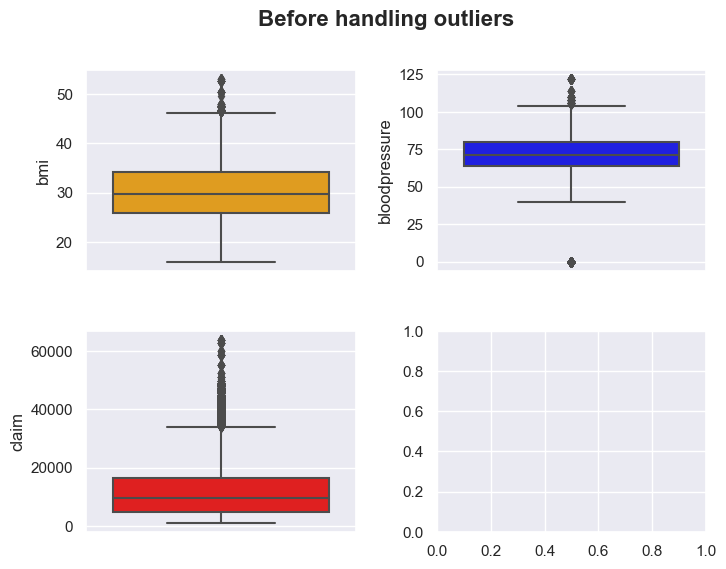

In [355]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=False)  # sharex=False เพื่อไม่ให้แกน x ของแต่ละกราฟเชื่อมโยงกัน

sns.boxplot(data=df, y="bmi",  ax=axs[0, 0], color='orange')
sns.boxplot(data=df, y="bloodpressure", ax=axs[0, 1], color='blue')
sns.boxplot(data=df, y="claim",  ax=axs[1, 0], color='red')

fig.suptitle("Before handling outliers", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3) 

In [356]:
# คอลัมน์ที่ต้องการจัดการ outliers
columns_to_handle = ['bmi', 'bloodpressure', 'claim']

# จัดการ outliers ใน columns ที่ระบุโดยใช้ IQR
for col in columns_to_handle:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)


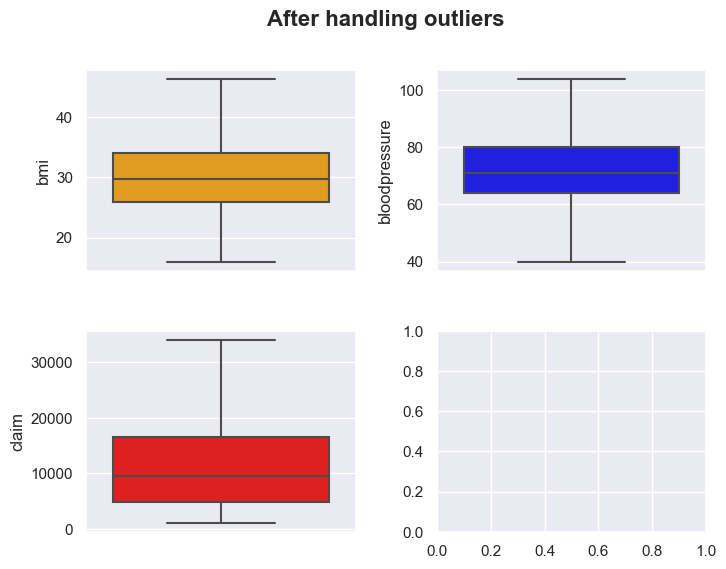

In [357]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=False)  

sns.boxplot(data=df, y="bmi",  ax=axs[0, 0], color='orange')
sns.boxplot(data=df, y="bloodpressure", ax=axs[0, 1], color='blue')
sns.boxplot(data=df, y="claim",  ax=axs[1, 0], color='red')

fig.suptitle("After handling outliers", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.3 ,  wspace= 0.3) 

## 5.5 Skewed Distribution Treatment

##### 💛💚 เพื่อทำให้กราฟเบ้ขวาให้ใกล้เคียงการกระจายตัวแบบ normalized  distribution
- การจัดการกับการกระจายตัวของข้อมูลที่เบ้ (Skewed Distribution) ด้วยวิธี Square Root Transformation
- เป็นหนึ่งในเทคนิคที่ใช้กันบ่อยในการปรับรูปแบบของข้อมูลให้ใกล้เคียงกับการแจกแจงแบบปกติ (Normal Distribution) มากขึ้น 
- วิธีนี้จะเหมาะสำหรับข้อมูลที่มีค่าเบ้ไปทางขวา (Right-Skewed)

***เพิ่มเติม***
- สำหรับข้อมูลที่มีการกระจายตัวแบบเบ้ไปทางซ้าย (Left-Skewed) นั้น วิธีที่นิยมใช้ในการปรับแก้คือ Cube Root Transformation
- Cube Root Transformation คือการหารากที่สามของค่าในข้อมูลนั้น
- นอกจากนี้ ยังมีวิธีอื่นๆ ในการจัดการ Skewed Distribution 
- เช่น Log Transformation, Box-Cox Transformation เป็นต้น ขึ้นอยู่กับลักษณะของข้อมูลว่าควรใช้วิธีใดจะเหมาะสมที่สุด

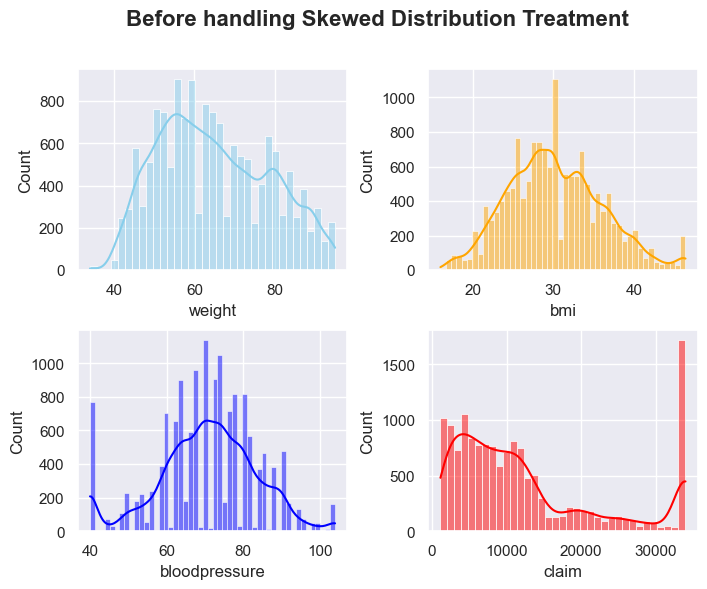

In [358]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.histplot(data=df, x="weight", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=df, x="bmi", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df, x="bloodpressure", kde=True, ax=axs[1, 0], color='blue')
sns.histplot(data=df, x="claim", kde=True, ax=axs[1, 1], color='red')

fig.suptitle("Before handling Skewed Distribution Treatment", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace= 0.3 ,wspace=0.3);

In [359]:
# Square Root Transformation 

df.weight = np.sqrt(df.weight)
df.bmi = np.sqrt(df.bmi)
df.bloodpressure = np.sqrt(df.bloodpressure)
df.claim = np.sqrt(df.claim)

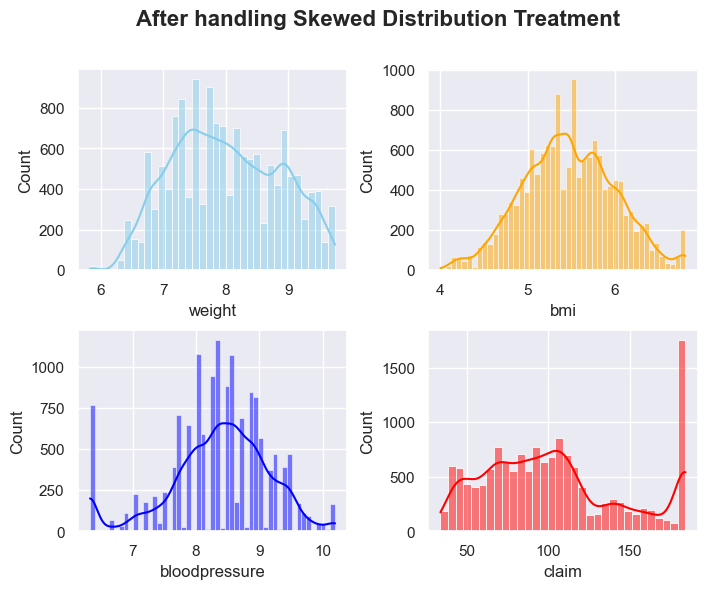

In [360]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex= False)

sns.histplot(data=df, x="weight", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=df, x="bmi", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df, x="bloodpressure", kde=True, ax=axs[1, 0], color='blue')
sns.histplot(data=df, x="claim", kde=True, ax=axs[1, 1], color='red')

fig.suptitle("After handling Skewed Distribution Treatment", fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace= 0.3 ,wspace=0.3);

## 5.6 Features Separating and Drop Unecessary Variables

🧡💚 กำหนดตัวแปรอิสระ (X) และ ตัวแปรตาม(y)

In [361]:
X = df.drop(["claim"], axis=1)
y = df["claim"]

In [362]:
X

age    weight       bmi  no_of_dependents  smoker  bloodpressure  \
0      60.0  8.000000  4.929503                 1       0       8.485281   
1      49.0  8.660254  4.753946                 1       0       8.831761   
2      32.0  8.000000  4.219005                 2       1       9.380832   
3      61.0  7.280110  6.033241                 1       1       8.485281   
4      19.0  7.071068  4.538722                 0       0       9.055385   
...     ...       ...       ...               ...     ...            ...   
14995  39.0  7.000000  5.319774                 1       1       7.348469   
14996  39.0  8.602325  5.440588                 4       0       8.000000   
14997  20.0  7.874008  5.770615                 0       0       7.211103   
14998  52.0  9.380832  6.058052                 0       0       8.366600   
14999  52.0  7.549834  5.138093                 3       0       8.485281   

       diabetes  regular_ex  sex_male  hereditary_diseases_Arthritis  ...  \
0             0           0         1                              0  ...   
1             1           1         0                              0  ...   
2             1           1         0                              0  ...   
3             1           0         0                              0  ...   
4             1           0         0                              0  ...   
...         ...         ...       ...                            ...  ...   
14995         1           0         1                              0  ...   
14996         1           0         1                              0  ...   
14997         1           0         1                              0  ...   
14998         1           0         1                              0  ...   
14999         1           0         1                              0  ...   

       job_title_Journalist  job_title_Labourer  job_title_Lawyer  \
0                         0                   0                 0   
1                         0                   0                 0   
2                         0                   0                 0   
3                         0                   0                 0   
4                         0                   0                 0   
...                     ...                 ...               ...   
14995                     0                   0                 0   
14996                     0                   0                 0   
14997                     0                   0                 0   
14998                     0                   0                 0   
14999                     0                   0                 0   

       job_title_Manager  job_title_Photographer  job_title_Police  \
0                      0                       0                 0   
1                      0                       0                 0   
2                      0                       0                 0   
3                      0                       0                 0   
4                      0                       0                 0   
...                  ...                     ...               ...   
14995                  0                       0                 0   
14996                  0                       0                 0   
14997                  0                       0                 0   
14998                  0                       0                 0   
14999                  1                       0                 0   

       job_title_Politician  job_title_Singer  job_title_Student  \
0                         0                 0                  0   
1                         0                 0                  0   
2                         0                 0                  0   
3                         0                 0                  0   
4                         0                 0                  0   
...                     ...               ...                ...   
14995                   

In [363]:
y

0        114.510262
1         97.811042
2        180.925952
3        184.465342
4         41.613700
            ...    
14995    145.197107
14996     86.673525
14997     37.302815
14998     95.627402
14999    161.222827
Name: claim, Length: 15000, dtype: float64

## 5.7 Data Normalization

In [364]:
X = StandardScaler().fit_transform(X)

In [365]:
X

array([[ 1.47892959, -0.01395376, -1.02061322, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.68351375,  0.76415482, -1.34964305, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [-0.54576526, -0.01395376, -2.35223078, ..., -0.22844814,
        -0.31063037, -0.13867034],
       ...,
       [-1.41349163, -0.16243532,  0.55580102, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535,  1.6133545 ,  1.09451655, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535, -0.54447333, -0.62967338, ..., -0.22844814,
        -0.31063037, -0.13867034]])

# 6. สร้างและเทรนโมเดล (Model Building and Training)

**คำอธิบาย:  จะสร้างโมเดล 2 แบบ นั่นคือ**
* โมเดล Linear model ได้แก่ Multiple linear regression, Ridge, Lasso, ElasticNet
* โมเดล Non-linear model ได้แก่ Decision Tree, Randon Forest

## 6.1 Linear model 💚💖

**Linear model ได้แก่ Multiple linear regression, Ridge, Lasso, ElasticNet**

### 6.1.1 หลักการทำงาน Linear model

**ขั้นตอนการทำงาน:**

1. **แบ่งข้อมูล:**  
    * แบ่งข้อมูลเป็น training set และ test set  **โดย test set จะถูกเก็บไว้ใช้สำหรับประเมินผลสุดท้ายเท่านั้น** 
2. **K-Fold Cross-Validation และ Grid Search:** 
    * วนลูปสำหรับแต่ละโมเดล:
        * ทำ Grid Search ร่วมกับ K-fold cross-validation **โดยใช้ training set ทั้งหมด** 
        * เลือก hyperparameters ที่ดีที่สุด ตามค่า Average R-squared (Validation Set) ที่ได้จาก cross-validation
3. **ประเมินผล Overfitting:** 
      * train  โมเดลที่  train  ด้วย  best parameters  จาก  K-Fold Cross-Validation  บน  training set  ทั้งหมด  
      * เปรียบเทียบ  R-squared   บน  training set  กับ  Average R-squared (validation set)  เพื่อเช็ค  overfitting   
      *  ถ้าโมเดลยัง  overfitting  อยู่  ให้ลองปรับ  hyperparameters  หรือเทคนิคอื่นๆ  
4. **เลือก Best Model:**  
    * เลือกโมเดลที่มี Average R-squared (Validation Set)  สูงสุดจากขั้นตอน cross-validation
5. **Train Final Model:**  
    * train โมเดลที่ดีที่สุดบน training set ทั้งหมด  
6. **ประเมินผลบน Test Set:** 
    * ประเมินประสิทธิภาพของ final model บน test set  

### 6.1.2 Splitting Dataset : 80% train set และ 20% test set

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### 6.1.3 กำหนดโมเดล

In [367]:
models = {
    'Multiple Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=5),
    'Lasso': Lasso(random_state=5),
    'ElasticNet': ElasticNet(random_state=5)
}

### 6.1.4  กำหนด parameter grids 

In [368]:
param_grids = {
    'Multiple Linear Regression': {},
    'Ridge': {'alpha': [0.5, 1, 2, 5]},
    'Lasso': {'alpha': [0.1, 0.2, 0.5]},
    'ElasticNet': {'alpha': [0.05, 0.1, 0.2, 0.5], 'l1_ratio': [0, 0.5, 1]}
}

**พารามิเตอร์ของ ElasticNet**

`l1_ratio`  ใน ElasticNet เป็น hyperparameter ที่ควบคุมสัดส่วนของ L1 regularization (Lasso) และ L2 regularization (Ridge) ในโมเดล 

**ค่าที่เป็นไปได้:**

* **0:** ใช้ L2 regularization เท่านั้น  เหมือนกับ Ridge regression
* **1:** ใช้ L1 regularization เท่านั้น  เหมือนกับ Lasso regression
* **ระหว่าง 0 ถึง 1:**  ใช้ทั้ง L1 และ L2 regularization   โดยค่า  `l1_ratio`  กำหนดสัดส่วน  เช่น  `l1_ratio=0.5`  หมายถึงใช้ L1 50%  และ L2 50% 

**ผลกระทบของ l1_ratio:**

* **l1_ratio ใกล้ 0:**  โมเดลมีแนวโน้มคล้าย Ridge  ลดน้ำหนักของ coefficients  แต่ไม่ทำให้เป็น  0 
* **l1_ratio ใกล้ 1:**  โมเดลมีแนวโน้มคล้าย Lasso  เลือก features  ที่สำคัญ  และทำให้ coefficients  ของ  features  ที่ไม่สำคัญเป็น  0  (feature selection)
* **l1_ratio ระหว่าง 0 ถึง 1:**  โมเดลผสมผสานข้อดีของ Ridge และ Lasso  

### 6.1.5  K-Fold Cross-Validation , Grid Search และ ประเมินผล Overfitting

In [369]:
# K-Fold Cross-Validation and Grid Search
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model_template in models.items():
    print(f"----- {name} -----")
    param_grid = param_grids[name]

    # สร้างโมเดลสำหรับ cross-validation และ Grid Search
    model_cv = GridSearchCV(model_template, param_grid, cv=cv, scoring='r2')
    model_cv.fit(X_train, y_train)

    #  เก็บผลลัพธ์ cross-validation 
    results[name] = {
        'cv_r2': model_cv.best_score_,
        'best_params': model_cv.best_params_,
        'validation_scores': model_cv.cv_results_['mean_test_score'], # เก็บ R-squared บน validation sets
        'best_model': model_cv.best_estimator_
    }
    
    # แสดงผลลัพธ์ cross-validation
    print("Cross-Validation R-squared scores:", results[name]['validation_scores'])
    print(f"Average R-squared (Validation Set): {results[name]['cv_r2']:.4f}")
    print(f"Best Parameters: {results[name]['best_params']}\n")

    # ประเมินผล Overfitting 
    # สร้างโมเดลสำหรับ train บน training set (ใช้ best_params)
    model_train = model_template.__class__(**model_cv.best_params_)
    model_train.fit(X_train, y_train)

    # ประเมินผลบน training set
    y_pred_train = model_train.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    print(f"R-squared (Training Set): {train_r2:.4f}")

    # เปรียบเทียบ R-squared
    print(f"R-squared diff: {train_r2 - results[name]['cv_r2']:.4f}\n")

----- Multiple Linear Regression -----
Cross-Validation R-squared scores: [0.7357279]
Average R-squared (Validation Set): 0.7357
Best Parameters: {}

R-squared (Training Set): 0.7435
R-squared diff: 0.0078

----- Ridge -----
Cross-Validation R-squared scores: [0.7357287  0.73572949 0.73573105 0.73573549]
Average R-squared (Validation Set): 0.7357
Best Parameters: {'alpha': 5}

R-squared (Training Set): 0.7435
R-squared diff: 0.0078

----- Lasso -----
Cross-Validation R-squared scores: [0.73691042 0.73684652 0.73483752]
Average R-squared (Validation Set): 0.7369
Best Parameters: {'alpha': 0.1}

R-squared (Training Set): 0.7426
R-squared diff: 0.0057

----- ElasticNet -----
Cross-Validation R-squared scores: [0.73411439 0.73567657 0.73654657 0.72983652 0.73454596 0.73691042
 0.71713002 0.73083274 0.73684652 0.6686952  0.70969879 0.73483752]
Average R-squared (Validation Set): 0.7369
Best Parameters: {'alpha': 0.1, 'l1_ratio': 1}

R-squared (Training Set): 0.7426
R-squared diff: 0.0057



### 6.1.6  Best model เลือกโมเดลที่ดีที่สุด

In [370]:
best_model_name = max(results, key=lambda x: results[x]['cv_r2'])
best_model = results[best_model_name]['best_model']

In [371]:
#แสดงผลลัพธ์โมเดลที่ดีที่สุด
print(f"\n----- Best Model: {best_model_name} -----")
print(f"Average R-squared (Validation Set): {results[best_model_name]['cv_r2']:.4f}")
print(f"Best Parameters: {results[best_model_name]['best_params']}")


----- Best Model: Lasso -----
Average R-squared (Validation Set): 0.7369
Best Parameters: {'alpha': 0.1}


### 6.1.7   Train Final Model บน training set ทั้งหมด

In [372]:
final_model = best_model
final_model.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=5)

### 6.1.8 ประเมินผล Final Model บน test set

In [373]:
y_pred_test = final_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
print(f"R-squared for predict: {test_r2:.4f}\n")

R-squared for predict: 0.7466



### 6.1.9 พิจารณาโมเดลที่แม่นยำที่สุด

**ข้อสังเกต**
* Average R-squared (Validation Set) ของ **Lasso และ ElasticNet** สูงที่สุด แต่ทำไมความแม่นยำยังต่ำ ~ 0.7369  แม้มีการปรับจูนพารามิเตอร์แล้ว
* นั่นอาจเพราะว่า ตัวแปรใน dataset มีความสัมพันธ์แบบ non-linear ซึ่งจะไม่เหมาะสมกับการทำโมเดลแบบ linear 
* โดยพิสูจน์ dataset ว่าเป็นความสัมพันธ์แบบไหน ได้ดังนี้

    1. ความสัมพันธ์ของตัวแปร (Correlation)
    2. กราฟ Pairplot
    3. กราฟ Residual Plot

#### 1. ความสัมพันธ์ของตัวแปร (Correlation)

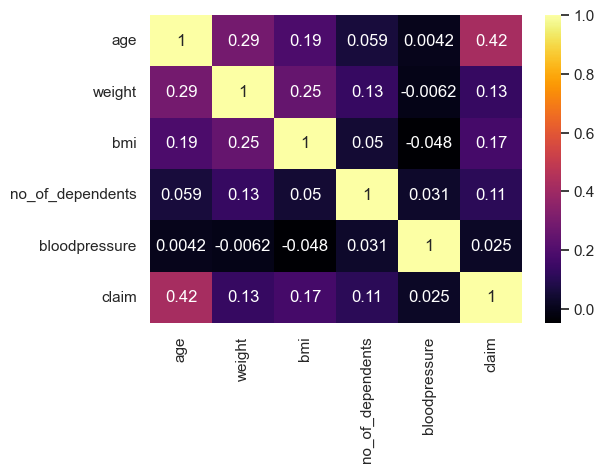

In [374]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"]].corr(), annot= True, cmap='inferno')
plt.show()

    💛 ลักษณะของ Correlation ข้อมูลชุดนี้มีค่า correlation coefficient  เข้าใกล้เลข 0
    💛 หมายความว่า ตัวแปรมีความสัมพันธ์กัน แบบ Non-linear (ไม่เป็นเส้นตรง)

#### 2. กราฟ Pairplot

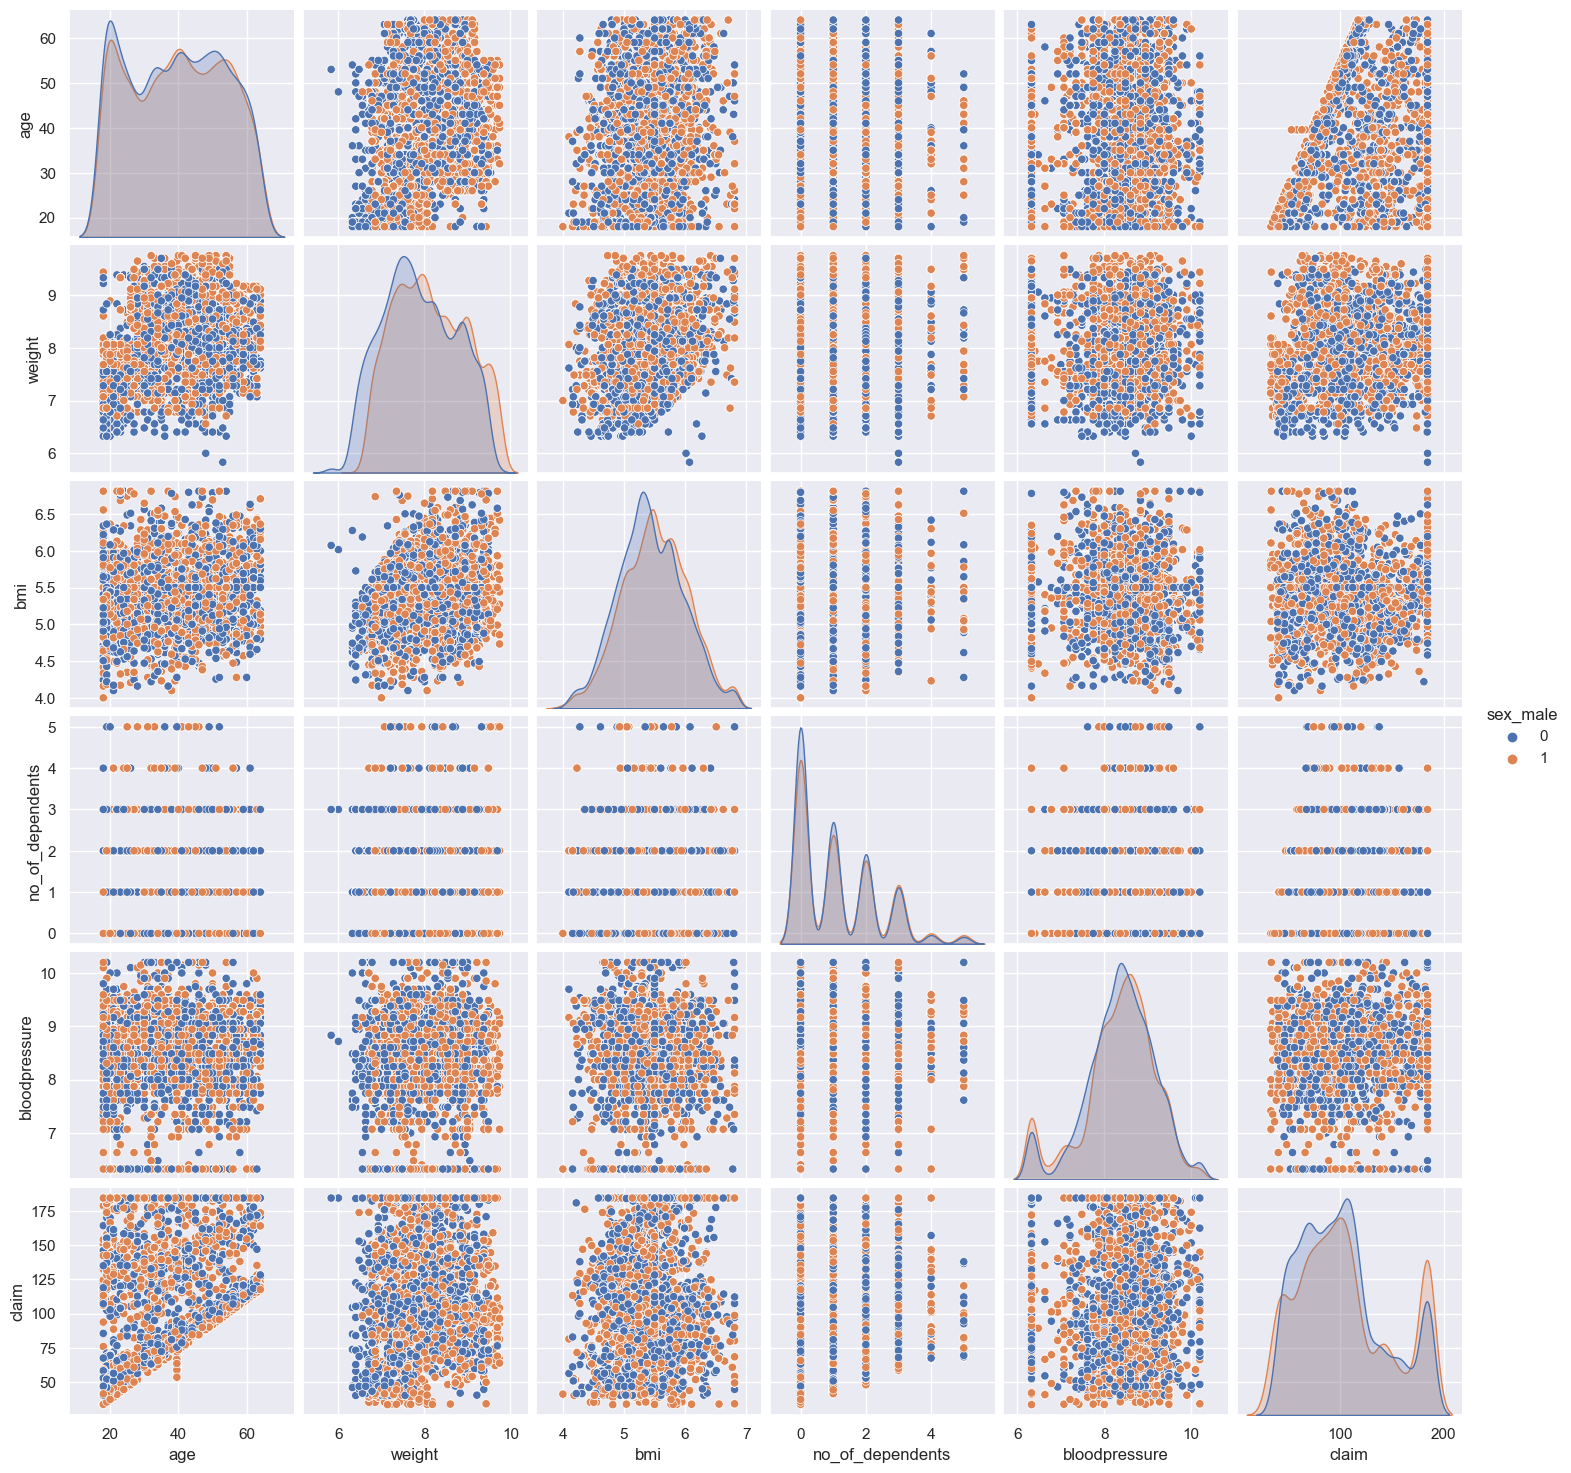

In [375]:
sns.pairplot(df, 
             vars = ["age", "weight", "bmi", "no_of_dependents", "bloodpressure", "claim"], hue = "sex_male" )
plt.show()

    🧡 ลักษณะของกราฟ Pair Plots หมายความว่า ตัวแปรในข้อมูลชุดนี้เป็นความสัมพันธ์กัน แบบ Non-linear (ไม่เป็นเส้นตรง)

#### 3. กราฟ Residual Plot

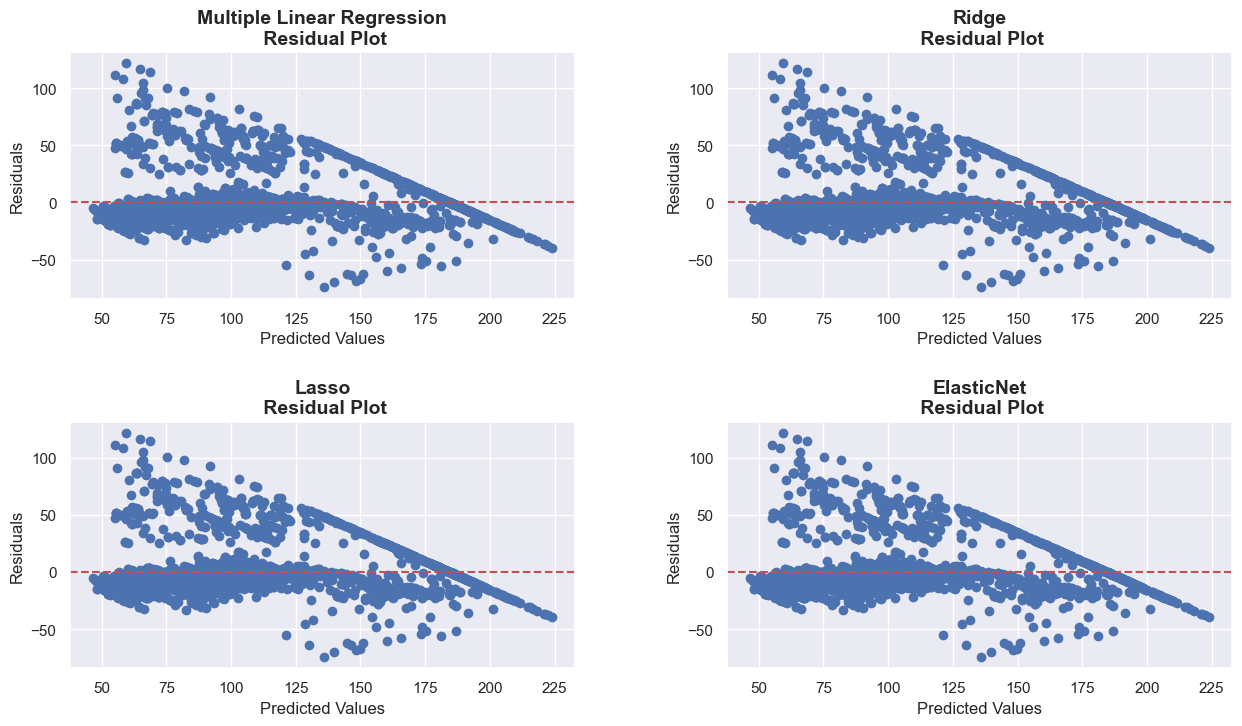

In [378]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

for i, (name, model) in enumerate(models.items()):
    row = i // 2  # คำนวณแถว
    col = i % 2   # คำนวณคอลัมน์

    y_pred_test = final_model.predict(X_test)
    residuals = y_test - y_pred_test

    axes[row, col].scatter(y_pred_test, residuals)
    axes[row, col].set_xlabel('Predicted Values')
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'{name}\n Residual Plot', fontsize=14, fontweight='bold')
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    
fig.subplots_adjust(hspace=0.5 ,  wspace= 0.3) 
plt.show()

####  ความหมายของกราฟ Residual Plot

* กราฟ Residual Plot แสดงให้เห็นว่า Linear Model อาจจะ **ไม่เหมาะสม** กับข้อมูล  
* และยังชี้ให้เห็นว่า **มีความสัมพันธ์แบบ non-linear** ระหว่าง features และ target variable  

**เหตุผล:**

* **รูปแบบที่ไม่สุ่มของ residuals:**   Residuals  ไม่ได้กระจายแบบสุ่มรอบเส้นแนวนอนที่  0 (เส้นสีแดง)   แต่กลับมี **แนวโน้มลดลง**   เมื่อ  predicted values  เพิ่มขึ้น  รูปแบบนี้บ่งชี้ว่า linear model ไม่สามารถจับความสัมพันธ์ในข้อมูลได้ดี   
*  ความแปรปรวนของ  residuals  ไม่คงที่  เพราะค่า Residuals  มีการกระจายตัวกว้าง  เมื่อ  predicted values  ต่ำ  และแคบลง  เมื่อ  predicted values  สูงขึ้น  
    บ่งชี้ว่า  linear model  อาจจะทำนาย  claim amount  ได้ไม่แม่นยำเท่ากันในทุกช่วงค่า  


### 6.1.10 สรุปผล Linear Model

### เมื่อพิจาณาจาก R-squared บน test set  , ความสัมพันธ์ของตัวแปร (Correlation), กราฟ Pairplot และ กราฟ Residual Plot  
* แสดงให้เห็นว่า linear model อาจจะไม่เหมาะสมกับข้อมูล  
* และบ่งชี้ว่าข้อมูลมีความสัมพันธ์แบบ  non-linear  ที่ต้องใช้โมเดลที่ซับซ้อนมาเพื่อปรับปรุงประสิทธิภาพการทำนาย
* โดยจะใช้ Decision tree l, Random forest model ในการทำนาย (ในหัวข้อ 6.2 Non-Linear model)

**💖-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------💖**

**💖-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------💖**

**💖-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------💖**

## 6.2 Non-linear model 💖🧡

💚 **Non-linear model ได้แก่ Decision Tree, Randon Forest**

### 6.2.1 หลักการทำงาน

**ขั้นตอนการทำงาน:**

  1. **Nested Cross-Validation:** 
        * ทำ  nested cross-validation  เพื่อหา  hyperparameters  ที่ดีที่สุด  โดยใช้  grid search  ใน  inner loop  
        * เก็บค่า  Average R-squared (Validation Set)  จาก  outer loop 
  2. **ประเมินผล Overfitting:** 
        * train  โมเดลที่  train  ด้วย  best parameters  จาก  nested cross-validation  บน  training set  ทั้งหมด  
        * เปรียบเทียบ  R-squared   บน  training set  กับ  Average R-squared (validation set)  เพื่อเช็ค  overfitting   
        *  ถ้าโมเดลยัง  overfitting  อยู่  ให้ลองปรับ  hyperparameters  หรือเทคนิคอื่นๆ  
  3. **เลือก Best Model:**  
        *  เลือกโมเดลที่มี  Average R-squared (Validation Set)  สูงที่สุด  
  4. **Train Final Model:** 
        *  train  โมเดลที่ดีที่สุดบน  training set  ทั้งหมด  เพื่อให้ได้  final model 
  5. **ประเมินผลบน Test Set:**  
        *  ประเมินผล  final model   บน  test set  เพื่อดูประสิทธิภาพสุดท้ายกับข้อมูลใหม่ 

In [379]:
X

array([[ 1.47892959, -0.01395376, -1.02061322, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.68351375,  0.76415482, -1.34964305, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [-0.54576526, -0.01395376, -2.35223078, ..., -0.22844814,
        -0.31063037, -0.13867034],
       ...,
       [-1.41349163, -0.16243532,  0.55580102, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535,  1.6133545 ,  1.09451655, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535, -0.54447333, -0.62967338, ..., -0.22844814,
        -0.31063037, -0.13867034]])

In [380]:
y

0        114.510262
1         97.811042
2        180.925952
3        184.465342
4         41.613700
            ...    
14995    145.197107
14996     86.673525
14997     37.302815
14998     95.627402
14999    161.222827
Name: claim, Length: 15000, dtype: float64

### 6.2.2 แบ่งข้อมูลเป็น training set และ test set 

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

### 6.2.3 กำหนดโมเดล

In [382]:
#กำหนดโมเดล
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=2),
    'Random Forest': RandomForestRegressor(random_state=2)
}

### 6.2.3 กำหนด parameter grids เพื่อปรับจูนหาพารามิเตอรืที่เหมาะสมที่สุด

In [383]:
#กำหนด parameter grids
param_grids = {
    'Decision Tree': {'max_depth': [10, 12], 'min_samples_split': [25,30], 'min_samples_leaf': [4,5]},
    'Random Forest': {'n_estimators': [200], 'max_depth': [10, 12], 'min_samples_split': [25, 30], 'min_samples_leaf': [4, 7]}
}

### 6.2.4 ทำ Nested Cross-Validation , Grid Search  และ ประเมินผล Overfitting

**คำอธิบาย:**
* model_cv: ใช้เฉพาะใน inner loop ของ nested cross-validation เพื่อหา hyperparameters ที่ดีที่สุด
* model_train: ถูกสร้างใหม่ โดยใช้ best parameters จาก model_cv แล้ว train บน training set ทั้งหมด เพื่อประเมินผลบน training set
* best_model: เก็บโมเดลที่ดีที่สุด

In [384]:
#ทำ Nested Cross-Validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=8)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=8)

results = {}
for name, model_template in models.items():
    print(f"----- {name} -----")
    param_grid = param_grids[name]

    nested_scores = []
    for train_index, test_index in outer_cv.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # สร้างโมเดลสำหรับ cross-validation และ Grid Search
        model_cv = GridSearchCV(model_template, param_grid, cv=inner_cv, scoring='r2')
        model_cv.fit(X_train_fold, y_train_fold)

        # ประเมินผลบน validation set ของ outer loop
        y_pred_cv = model_cv.predict(X_test_fold)
        r2 = r2_score(y_test_fold, y_pred_cv)
        nested_scores.append(r2)

    # เก็บผลลัพธ์ nested cross-validation
    results[name] = {
        'cv_r2': np.mean(nested_scores),
        'best_params': model_cv.best_params_,
        'best_model': model_cv.best_estimator_
    }

    # แสดงผลลัพธ์ nested cross-validation
    print("Nested Cross-Validation R-squared scores:", nested_scores)
    print(f"Average R-squared (Validation Set): {np.mean(nested_scores):.4f}")
    print(f"Best Parameters: {model_cv.best_params_}\n")

    # ประเมินผล Overfitting
    # สร้างโมเดลสำหรับ train บน training set (ใช้ best_params)
    model_train = model_template.__class__(**model_cv.best_params_)
    model_train.fit(X_train, y_train)  #  Train บน X_train, y_train

    # ประเมินผลบน training set
    y_pred_train = model_train.predict(X_train)  #  ทำนายบน X_train
    train_r2 = r2_score(y_train, y_pred_train)
    print(f"R-squared (Training Set): {train_r2:.4f}")

    # เปรียบเทียบ R²
    print(f"R-squared diff: {train_r2 - np.mean(nested_scores):.4f}\n")

----- Decision Tree -----
Nested Cross-Validation R-squared scores: [0.9084757853811896, 0.9209123098437025, 0.9244566429754879, 0.9153332353170571, 0.9254360212723092]
Average R-squared (Validation Set): 0.9189
Best Parameters: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 25}

R-squared (Training Set): 0.9389
R-squared diff: 0.0200

----- Random Forest -----
Nested Cross-Validation R-squared scores: [0.9283240352242768, 0.9240375010314686, 0.933510448698164, 0.9339786599218636, 0.9336271476764875]
Average R-squared (Validation Set): 0.9307
Best Parameters: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 25, 'n_estimators': 200}

R-squared (Training Set): 0.9477
R-squared diff: 0.0170



### 6.2.5 เลือก Best Model

In [385]:
# Model Evaluation: เลือกโมเดลที่ดีที่สุด
best_model_name = max(results, key=lambda x: results[x]['cv_r2'])
best_model = results[best_model_name]['best_model']

In [386]:
# แสดงผลลัพธ์โมเดลที่ดีที่สุด
print(f"\n----- Best Model: {best_model_name} -----")
print(f"Average R-squared (Validation Set): {results[best_model_name]['cv_r2']:.4f}")
print(f"Best Parameters: {results[best_model_name]['best_params']}")


----- Best Model: Random Forest -----
Average R-squared (Validation Set): 0.9307
Best Parameters: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 25, 'n_estimators': 200}


### 6.2.6 Train Final Model:  train โมเดลที่ดีที่สุดบน training set ทั้งหมด เพื่อให้ได้ final model

In [387]:
# Train Final Model 
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, min_samples_split=25,
                      n_estimators=200, random_state=2)

### 6.2.7 ประเมินผลบน Test Set: ประเมินผล final model บน test set เพื่อดูประสิทธิภาพสุดท้ายกับข้อมูลใหม่ที่โมเดลไม่เคยเห็นมาก่อน

In [388]:
# ประเมินผล Final Model บน test set 
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R-squared for predict: {test_r2:.4f}\n")

R-squared for predict: 0.9281



# 7.ดึงโมเดลออกไปใช้งาน 💛💖

###  การบันทึกโมเดล

In [391]:
# บันทึกโมเดลที่ดีที่สุดด้วย pickle  โมเดลชื่อว่า best_model
import pickle
filename = 'Health_Insurance_Claim_Prediction.pkl'
pickle.dump(best_model, open(filename, 'wb'))
print(f"Saved best model to '{filename}'")

Saved best model to 'Health_Insurance_Claim_Prediction.pkl'


### การโหลดโมเดลกลับมาใช้ 

In [390]:
filename = 'Health_Insurance_Claim_Prediction.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

###  วิธีทำนายค่าประกันสุขภาพที่ผู้ถือกรมธรรม์เรียกร้อง(Claim Amount)

#### ทำนายค่า
- Health_Insurance_Claim_Prediction = loaded_model.predict(new_data)
- โดย new_data ต้องผ่านการทำ Data processing มาแล้ว

#### แสดงผลลัพธ์
- print("Predictions:", Health_Insurance_Claim_Prediction)